<a href="https://colab.research.google.com/github/alexandreleitetrevisani/DATA_SCIENCE_MACHINE_LEARNING/blob/master/AirPassengers_TimeSeriesPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.tools.eval_measures import rmse
from sklearn.preprocessing import MinMaxScaler
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('https://storage.googleapis.com/kagglesdsdata/datasets/1057/1913/AirPassengers.csv?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1590431296&Signature=c47yC1p7mzn%2B8K57yVlv%2BQ0u9aa50najQEW%2FP8aEYKCP3O8DBCF%2BT68Va6BvXIBwQo4K3G0SwFEuOaWBWpvVzVUIqIXkLDlPzgoPcPGI8yxa9xYHwJ1erMpL4hAl6nVyh7cCAjSGUR3sp0DWHBzSYS0q%2BCZynN7dED7tMOuD5Sy%2B1jrwYX2W23sk4vvHR9hVNkrZ2sSzKkhRwlQ8%2FmeMHBjtRYDx4lQnXH3ilwHJCkF8y902Tybmws5nFno5tgjiU9yCtgV7m447lFRC4IbKrAeGrrbIsDBOYI9oLrclFNQ4g48mweba%2BpZKp4KDyXC9uniHABh%2F7Fb2R2JRo%2Bs3Xg%3D%3D&response-content-disposition=attachment%3B+filename%3DAirPassengers.csv')


In [10]:
df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [0]:
df.Month = pd.to_datetime(df.Month)
df = df.set_index('Month')
                          

In [12]:
df.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [0]:
train, test = df[:-12], df[-12:]

In [0]:
scaler = MinMaxScaler()
scaler.fit(train)
train = scaler.transform(train)
test = scaler.transform(test)

In [20]:
n_input = 12
n_features = 1
generator = TimeseriesGenerator(train, train, length=n_input, batch_size=6)

model = Sequential()
model.add(LSTM(200, activation='relu', input_shape=(n_input, n_features)))
model.add(Dropout(0.15))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

model.fit_generator(generator, epochs=180)

Epoch 1/180
20/20 [==============================] - 1s 31ms/step - loss: 0.0623
Epoch 2/180
20/20 [==============================] - 0s 17ms/step - loss: 0.0145
Epoch 3/180
20/20 [==============================] - 0s 18ms/step - loss: 0.0113
Epoch 4/180
20/20 [==============================] - 0s 17ms/step - loss: 0.0097
Epoch 5/180
20/20 [==============================] - 0s 17ms/step - loss: 0.0100
Epoch 6/180
20/20 [==============================] - 0s 18ms/step - loss: 0.0107
Epoch 7/180
20/20 [==============================] - 0s 17ms/step - loss: 0.0106
Epoch 8/180
20/20 [==============================] - 0s 18ms/step - loss: 0.0093
Epoch 9/180
20/20 [==============================] - 0s 17ms/step - loss: 0.0095
Epoch 10/180
20/20 [==============================] - 0s 17ms/step - loss: 0.0127
Epoch 11/180
20/20 [==============================] - 0s 18ms/step - loss: 0.0106
Epoch 12/180
20/20 [==============================] - 0s 17ms/step - loss: 0.0073
Epoch 13/180
20/20 [=====

In [0]:
pred_list = []

batch = train[-n_input:].reshape((1, n_input, n_features))

for i in range(n_input):
    pred_list.append(model.predict(batch)[0])
    batch = np.append(batch[:, 1:,:], [[pred_list[i]]], axis=1)
    

In [0]:
df_predict = pd.DataFrame(scaler.inverse_transform(pred_list), index=df[-n_input:].index, columns=['Predictions'])

df_test = pd.concat([df, df_predict], axis=1)

In [23]:
df_test.head()

,#Passengers,Predictions
Month,,
1949-01-01,112,NaN
1949-02-01,118,NaN
1949-03-01,132,NaN
1949-04-01,129,NaN
1949-05-01,121,NaN


In [25]:
df_test.tail(15)

,#Passengers,Predictions
Month,,
1959-10-01,407,NaN
1959-11-01,362,NaN
1959-12-01,405,NaN
1960-01-01,417,379.126580
1960-02-01,391,377.714382
1960-03-01,419,409.823403
1960-04-01,461,410.935870
1960-05-01,472,439.995559
1960-06-01,535,503.007651


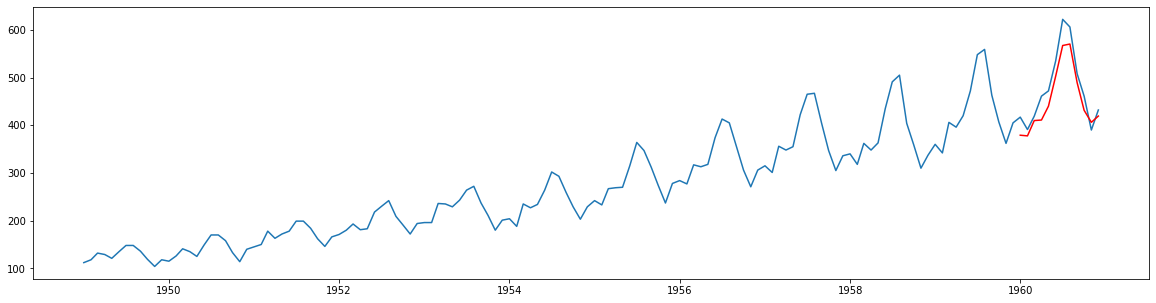

In [28]:
plt.figure(figsize=(20,5))
plt.plot(df_test.index, df_test['#Passengers'])
plt.plot(df_test.index, df_test['Predictions'], color='r')
plt.show()

In [29]:
train = df

scaler.fit(train)
train = scaler.transform(train)

n_input = 12
n_features = 1

generator = TimeseriesGenerator(train, train, length=n_input, batch_size=6)

model.fit_generator(generator, epochs=180)

pred_list = []

batch = train[-n_input:].reshape((1, n_input, n_features))

for i in range(n_input):
    pred_list.append(model.predict(batch)[0])
    batch = np.append(batch[:, 1:, :], [[pred_list[i]]], axis=1)
    


Epoch 1/180
22/22 [==============================] - 0s 18ms/step - loss: 0.0022
Epoch 2/180
22/22 [==============================] - 0s 18ms/step - loss: 0.0021
Epoch 3/180
22/22 [==============================] - 0s 18ms/step - loss: 0.0020
Epoch 4/180
22/22 [==============================] - 0s 17ms/step - loss: 0.0020
Epoch 5/180
22/22 [==============================] - 0s 17ms/step - loss: 0.0014
Epoch 6/180
22/22 [==============================] - 0s 17ms/step - loss: 0.0014
Epoch 7/180
22/22 [==============================] - 0s 17ms/step - loss: 0.0023
Epoch 8/180
22/22 [==============================] - 0s 17ms/step - loss: 0.0014
Epoch 9/180
22/22 [==============================] - 0s 17ms/step - loss: 0.0012
Epoch 10/180
22/22 [==============================] - 0s 18ms/step - loss: 0.0017
Epoch 11/180
22/22 [==============================] - 0s 17ms/step - loss: 0.0025
Epoch 12/180
22/22 [==============================] - 0s 17ms/step - loss: 0.0013
Epoch 13/180
22/22 [=====

In [0]:
from pandas .tseries.offsets import DateOffset
add_dates = [df.index[-1] + DateOffset(months=x) for x in range(0,13)]
future_dates = pd.DataFrame(index=add_dates[1:], columns=df.columns)

In [31]:
future_dates.tail(12)

,#Passengers
1961-01-01,NaN
1961-02-01,NaN
1961-03-01,NaN
1961-04-01,NaN
1961-05-01,NaN
1961-06-01,NaN
1961-07-01,NaN
1961-08-01,NaN
1961-09-01,NaN
1961-10-01,NaN


In [0]:
df_predict = pd.DataFrame(scaler.inverse_transform(pred_list),
                          index=future_dates[-n_input:].index, columns=['Prediction'])

df_proj = pd.concat([df, df_predict], axis=1)

In [33]:
df_proj.tail(14)

,#Passengers,Prediction
1960-11-01,390.0,NaN
1960-12-01,432.0,NaN
1961-01-01,NaN,445.141263
1961-02-01,NaN,427.666452
1961-03-01,NaN,452.473259
1961-04-01,NaN,492.297273
1961-05-01,NaN,519.505431
1961-06-01,NaN,598.904790
1961-07-01,NaN,684.656661
1961-08-01,NaN,657.187917


No handles with labels found to put in legend.


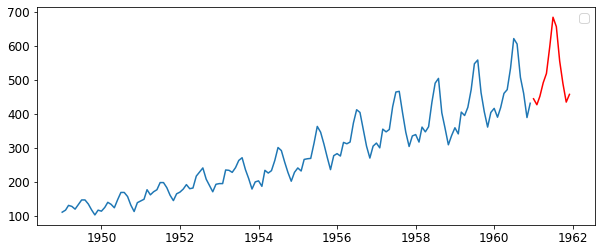

In [34]:
plt.figure(figsize=(10,4))
plt.plot(df_proj.index, df_proj['#Passengers'])
plt.plot(df_proj.index, df_proj['Prediction'], color='r')
plt.legend(loc='best', fontsize='large')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()